# Convolution Neural Network

## Xử lí ảnh 

https://stackoverflow.com/questions/37431599/how-to-slice-an-image-into-red-green-and-blue-channels-with-misc-imread

In [14]:
import cv2

# Đường dẫn đến ảnh đầu vào
input_image_path = 'input_image.jpg'

# Đọc ảnh đầu vào
image = cv2.imread(input_image_path)

# Tách các kênh màu
blue_channel, green_channel, red_channel = cv2.split(image)

# Hiển thị từng kênh màu
cv2.imshow('Blue Channel', blue_channel)
cv2.imshow('Green Channel', green_channel)
cv2.imshow('Red Channel', red_channel)
cv2.waitKey(0)
cv2.destroyAllWindows()

[None, <matplotlib.colors.LinearSegmentedColormap object at 0x00000285CE8A8DC0>, <matplotlib.colors.LinearSegmentedColormap object at 0x00000285CE8A8AC0>, <matplotlib.colors.LinearSegmentedColormap object at 0x00000285CE8A89A0>]


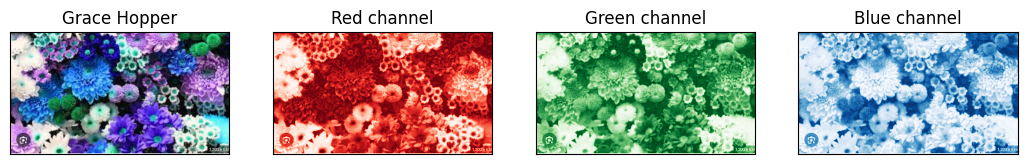

In [10]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('input_image.jpg')

titles = ['Grace Hopper', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

fig, axes = plt.subplots(1, 4, figsize=(13,3))
objs = zip(axes, (image, *image.transpose(2,0,1)), titles, cmaps)

for ax, channel, title, cmap in objs:
    ax.imshow(channel, cmap=cmap)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

plt.savefig('RGB1.png')

#### TASK :
- Hiển thị hình ảnh , in ra thông tin , ma trận trọng số của ảnh 
- Resize hình ảnh 
- Chuyển thành 3 ảnh red , green , blue 
- Chuyển thành ảnh grey 


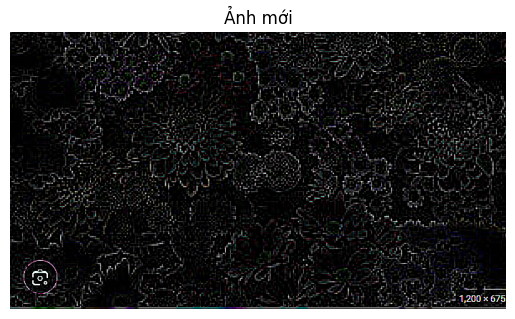

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh đầu vào
input_image = cv2.imread('input_image.jpg')
# print(input_image)
# kernel = np.array([[1, 1, 1],
#                 [1, 1, 1],
#                 [1, 1, 1]])

kernel = np.array([[-1, -1, -1],
                [-1, 8, -1],
                [-1, -1, -1]])

# Áp dụng kernel cho ảnh
output_image = cv2.filter2D(input_image, -1, kernel)

# In ra ma trận của ảnh mới
# print("Ma trận của ảnh mới:")
# print(output_image)

# Hiển thị ảnh mới
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Ảnh mới')
plt.show()


#### Áp dụng kernel cho ảnh xám 

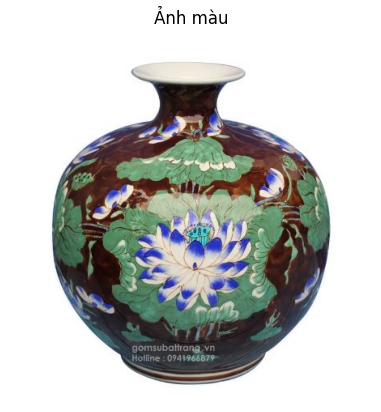

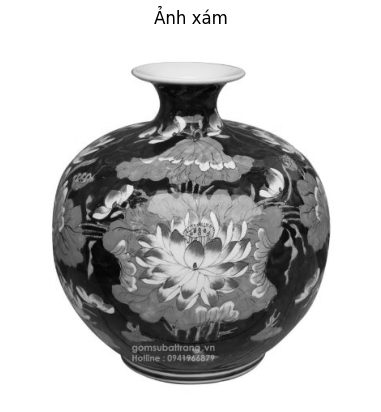

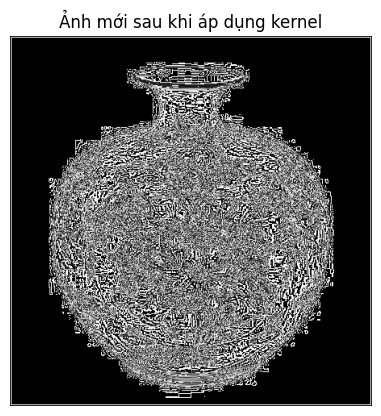

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh đầu vào
input_image = cv2.imread('input_image2.jpg')

# Hiển thị ảnh màu đầu vào
plt.imshow(input_image)
plt.axis('off')
plt.title('Ảnh màu')
plt.show()

# Chuyển đổi ảnh màu thành ảnh xám
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Hiển thị ảnh xám
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Ảnh xám')
plt.show()

# Khai báo kernel cho phát hiện biên cạnh
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Thêm lớp padding giá trị 0 quanh ảnh xám
gray_image = np.pad(gray_image, ((1, 1), (1, 1)), mode='constant', constant_values=0)

# Áp dụng kernel cho ảnh xám để phát hiện biên cạnh
output_image = np.zeros_like(gray_image)
for i in range(1, gray_image.shape[0] - 1):
    for j in range(1, gray_image.shape[1] - 1):
        output_image[i, j] = np.sum(gray_image[i - 1:i + 2, j - 1:j + 2] * kernel)

# Chuẩn hóa kết quả về khoảng [0, 255]
output_image = np.clip(output_image, 0, 255).astype(np.uint8)

# Hiển thị ảnh mới sau khi áp dụng kernel
plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.title('Ảnh mới sau khi áp dụng kernel')
plt.show()

#### Áp dụng kernel cho ảnh màu 

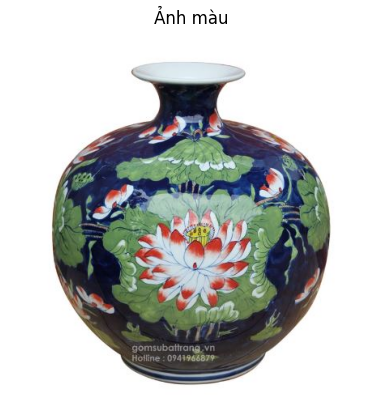

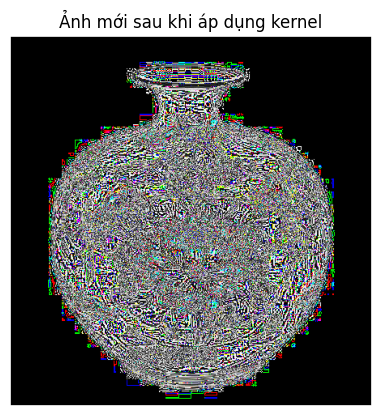

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh đầu vào
input_image = cv2.imread('input_image2.jpg')

# Hiển thị ảnh màu đầu vào
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Ảnh màu')
plt.show()

# Khai báo kernel cho phát hiện biên cạnh
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Thêm lớp padding giá trị 0 quanh ảnh màu input_image
padded_image = np.pad(input_image, ((1, 1), (1, 1), (0, 0)), mode='constant')

# Áp dụng kernel cho ảnh màu để phát hiện biên cạnh
output_image = np.zeros_like(input_image)
for i in range(1, input_image.shape[0] + 1):
    for j in range(1, input_image.shape[1] + 1):
        for c in range(input_image.shape[2]):
            output_image[i-1, j-1, c] = np.sum(padded_image[i - 1:i + 2, j - 1:j + 2, c] * kernel)

output_image = np.clip(output_image, 0, 255).astype(np.uint8)

# Hiển thị ảnh mới sau khi áp dụng kernel
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Ảnh mới sau khi áp dụng kernel')
plt.show()

## Convolution Neural Network

#### Xem chi tiết về Kiến trúc và cách build kiến trúc bằng Keras (Có giải thích chi tiết) tại file : 
```C:\Users\ADMIN\Downloads\DeepLearning\Learning\Chapter4_CNN\Lab4_MNIST_Detail.ipynb```